# 임해찬 https://github.com/ManD-B

## 1. 아이리스 교차검증

In [1]:
import pandas as pd
df = pd.read_csv('../dataset/iris.csv', 
                 names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

In [3]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
dataset = df.values
X = np.array(dataset[:,0:4], dtype=np.float64)
Y_obj = dataset[:,4]

Y_obj[0], Y_obj[50], Y_obj[100]

('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')

In [5]:
e = LabelEncoder().fit(Y_obj)
Y = np.array(e.transform(Y_obj), dtype=np.float64)

In [6]:
Y.shape

(150,)

In [7]:
# 5개로 쪼갬
n_fold = 5
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [8]:
# 빈 accuracy 리스트
accuracy = []

In [14]:
# One hot encoding
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded[0], Y_encoded[50], Y_encoded[100]

(array([1., 0., 0.], dtype=float32),
 array([0., 1., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32))

In [15]:
Y_encoded.shape

(150, 3)

In [32]:
Y.shape

(150,)

In [28]:
# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential([
        Dense(16, input_shape=(4,), activation='relu'),
        Dense(8, activation='relu'), 
        Dense(1, activation='sigmoid')
    ])
#     model.summary()
    model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=50, batch_size=30, verbose=0)
    
    print(len(X[train]), len(X[test]), end='  ')
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test], verbose=0)[1])
    print(k_accuracy)
    accuracy.append(k_accuracy)

120 30  0.6667
120 30  0.3333
120 30  0.3333
120 30  0.3333
120 30  0.6667


## 2. MNIST CNN분류

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [54]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [55]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_114 (Dense)            (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)             

In [56]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [58]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [60]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5,
                    batch_size=1000, verbose=1,
                    callbacks=[checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
59000/60000 [============================>.] - ETA: 0s - loss: 0.0584 - accuracy: 0.9818
Epoch 00001: val_loss improved from inf to 0.03342, saving model to ./model/mnist-cnn-01-0.0334.hdf5
60000/60000 [==============================] - 37s 618us/sample - loss: 0.0584 - accuracy: 0.9817 - val_loss: 0.0334 - val_accuracy: 0.9889
Epoch 2/5
59000/60000 [============================>.] - ETA: 0s - loss: 0.0520 - accuracy: 0.9846
Epoch 00002: val_loss improved from 0.03342 to 0.03218, saving model to ./model/mnist-cnn-02-0.0322.hdf5
60000/60000 [==============================] - 37s 618us/sample - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.0322 - val_accuracy: 0.9895
Epoch 3/5
59000/60000 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9854
Epoch 00003: val_loss did not improve from 0.03218
60000/60000 [==============================] - 37s 614us/sample - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0325

In [61]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/mnist-cnn-05-0.0290.hdf5')

In [62]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy: 0.9902


In [63]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

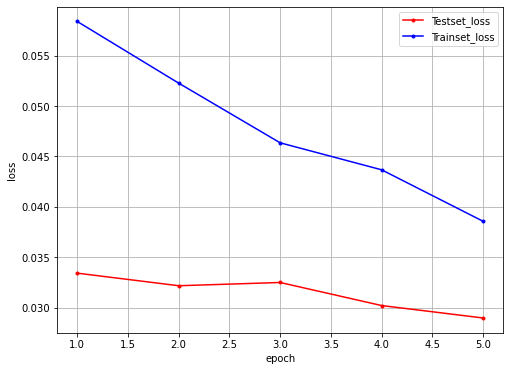

In [64]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. IMDB 영화 리뷰 감성분석

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

from tensorflow import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences

In [27]:
import pandas as pd

train = pd.read_csv("labeledTrainData.tsv", delimiter='\t', header=0)

train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [31]:
# Null 값을 가진 샘플이 있는지 확인
train.isnull().values.any()

False

In [29]:
movie['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [30]:
train['review'][0][:100]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching t"

In [34]:
import BeautifulSoup

ModuleNotFoundError: No module named 'BeautifulSoup'